In [13]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [14]:
train_features = np.load('features.npz')
test_features = np.load('tfeatures.npz')
y_rgb = train_features['labels']
targets = np.load('targets.npz')

In [15]:
rgb_train = train_features['features']
rgb_test = test_features['features']
nir_train = train_features['features_swir']
nir_test =  test_features['swirf']
mc = targets['mc']
cprotein = targets['cprotein']
cfiber = targets['cfiber']
calcium = targets['calcium']
phosphorus = targets['phosphprus']
phosphorus

array([0.05, 0.05, 0.11, 0.01, 0.08, 0.05, 0.39, 0.09, 0.04, 0.03, 0.15,
       0.19, 0.07, 0.01, 0.04, 0.03, 0.13, 0.01, 0.08, 0.31, 1.16, 0.31,
       0.05, 0.12, 0.78, 0.04, 0.04, 0.11, 0.03, 0.01, 0.54, 0.15, 0.01,
       0.51, 0.48, 0.03, 0.2 , 0.02, 0.14, 0.08, 0.04, 1.14, 0.19, 0.03,
       0.09, 0.02, 0.03, 0.13, 0.24, 0.06, 0.32, 0.41, 0.02, 0.04, 0.27,
       0.5 , 0.01, 0.01, 0.01, 0.35, 0.02, 0.14, 0.03, 0.03, 0.11, 0.11,
       0.06, 0.08, 0.05])

In [21]:
print(rgb_train.shape) #check the shape of the feature before operation
#select the rgb training feature
features = rgb_train

(69, 25088)


In [17]:
# Count the number of zeros in each column
num_zeros = np.sum(features == 0, axis=0)

# Create a mask for columns with more than 10 zeros
mask = num_zeros <= 10

# Filter the features based on the mask
filtered_features = features[:, mask]

# Compute the mean and standard deviation of the non-zero values
non_zero_features = filtered_features[filtered_features != 0]
mean = np.mean(non_zero_features)
std = np.std(non_zero_features)

# Create a mask for the zero values in the filtered features
zero_mask = filtered_features == 0

# Replace the zero values with the mean value
filtered_features[zero_mask] = mean

#Normalize the non-zero values using the standard scaler
scaler = StandardScaler()
normalized_features = scaler.fit_transform(filtered_features)

In [18]:
normalized_features.shape

(69, 545)

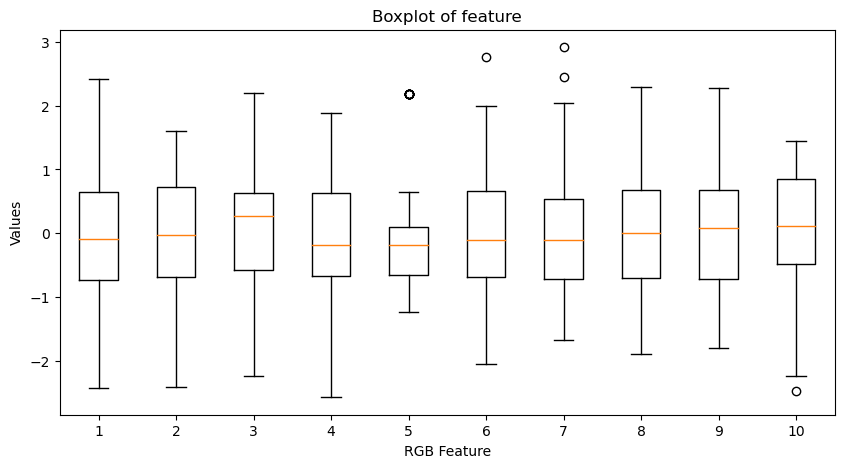

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.boxplot(normalized_features[:, 500:510], whis=1.5)
ax.set_title('Boxplot of feature')
ax.set_xlabel('RGB Feature')
ax.set_ylabel('Values')
plt.show()